In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('./raw_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Analysis

In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Feature 'TotalCharges' has numerical values but it's identified as object. Let's change it into numerical

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(df)

Your selected dataframe has 21 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
TotalCharges,11,0.2


In [10]:
missing_totalcharges_mask = df['TotalCharges'].isnull()
rows_with_missing_totalcharges = df[missing_totalcharges_mask]

rows_with_missing_totalcharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


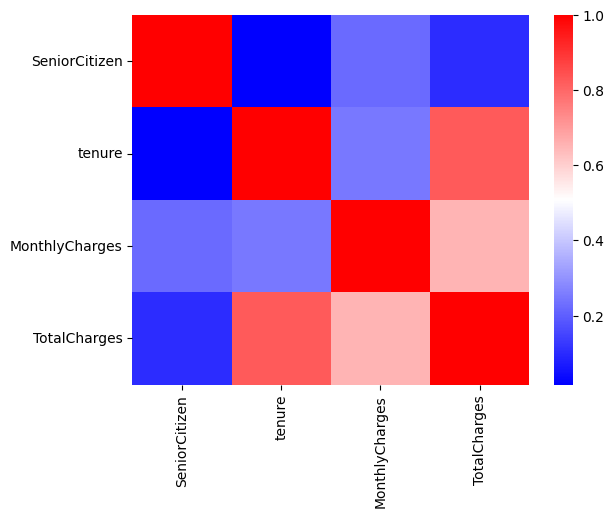

In [12]:
correlation_matrix = df.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

MonthlyCharges is not highly correlated to any other numerical feature, so there's not much we can do with the missing values of this feature. Let's drop the rows with NaN values for the feature MonthlyCharges

In [13]:
df = df.dropna(subset=['TotalCharges'])
df.shape

(7032, 21)

In [14]:
missing_values_table(df)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Feature correlation with target

Target Encoding

In [15]:
df2 = df.iloc[:, 1:]

df2['Churn'].replace('Yes', 1, inplace=True)
df2['Churn'].replace('No', 0, inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Convert all categorical features into dummy variables

In [16]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

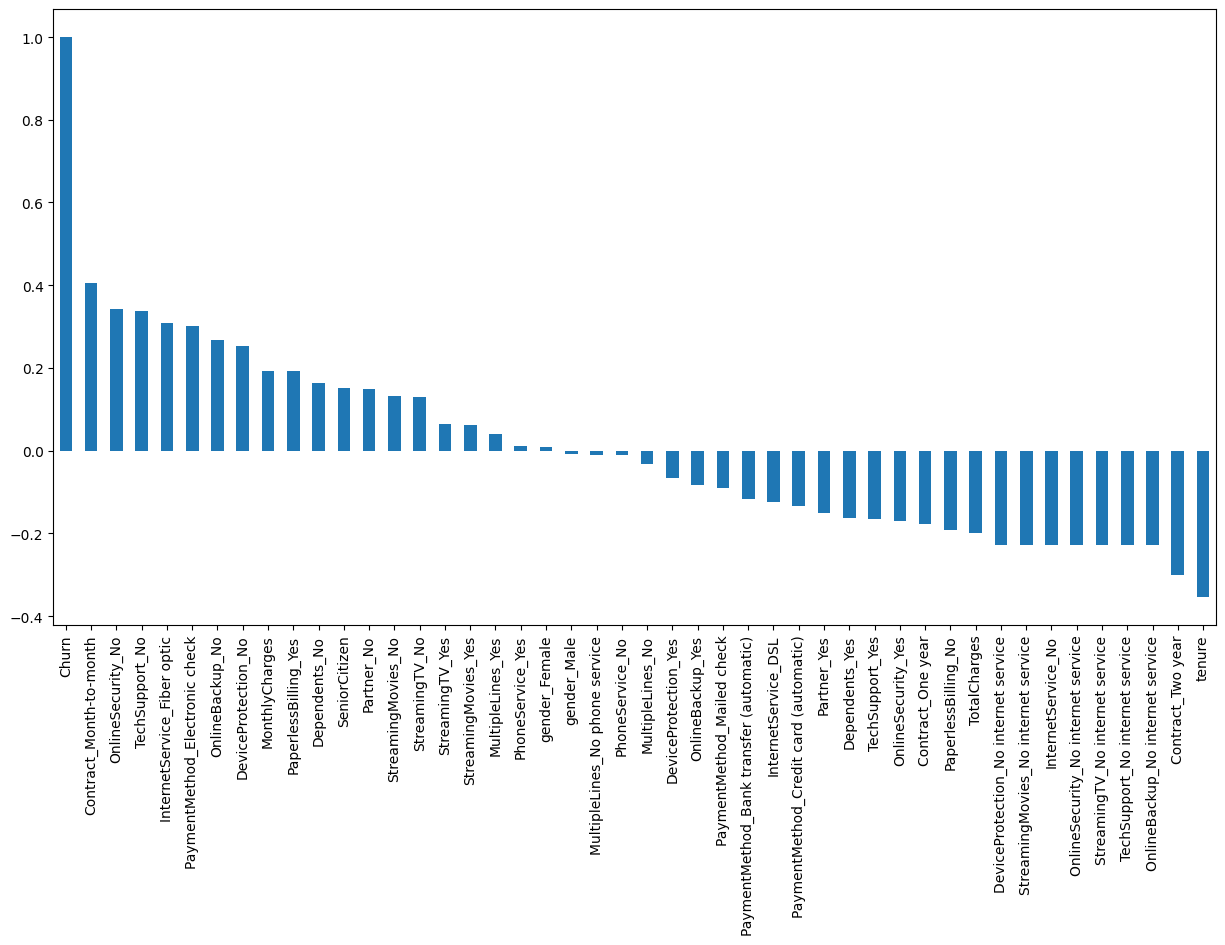

In [17]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, No online security and No Tech support are the top 3 most correlated features with a positive correlation against 'Churn'. On the other side, the top 3 negatively correlated to 'Churn' are Tenure, Two year Contracts and Online Backup

## Feature Analysis

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Following the same approach as https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction, let's start looking at the demographic distributions, such as gender, age range, dependents and partners

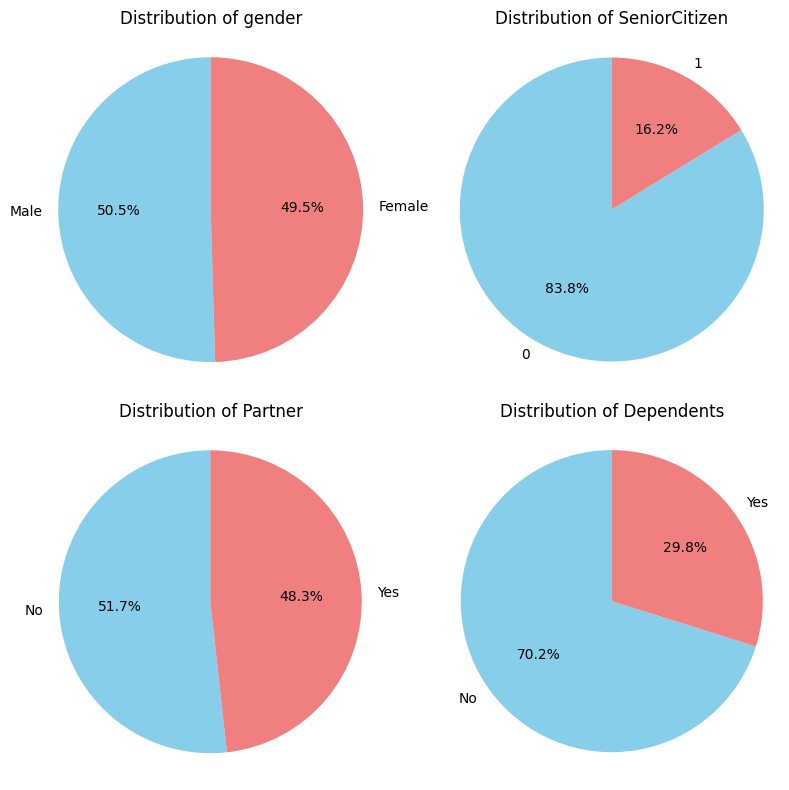

In [19]:
variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    counts = df[var].value_counts()
    axes[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    axes[row, col].set_title(f'Distribution of {var}')

    # Equal aspect ratio ensures the pie charts are circular
    axes[row, col].axis('equal')

plt.tight_layout()
plt.show()

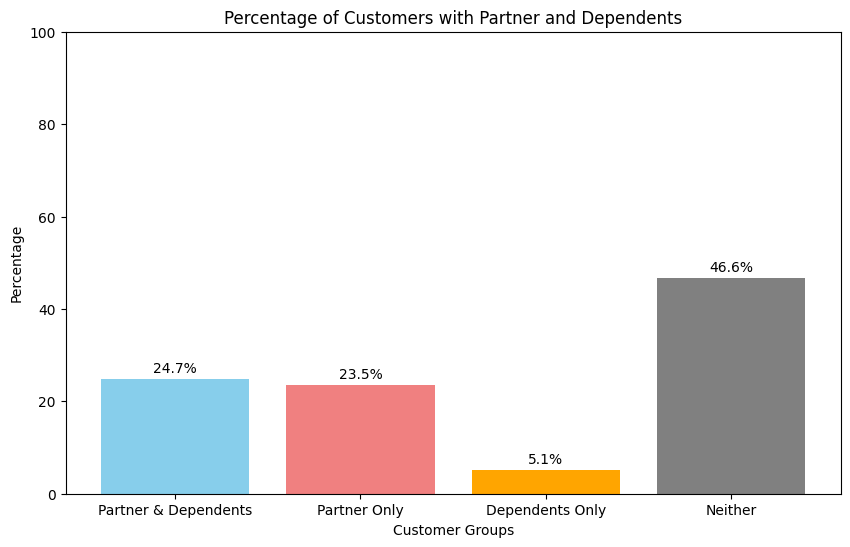

In [20]:
# Calculate the percentage of customers with 'Partner' and 'Dependents'
total_customers = len(df)
partner_dependents = len(df[(df['Partner'] == 'Yes') & (df['Dependents'] == 'Yes')])
partner_only = len(df[(df['Partner'] == 'Yes') & (df['Dependents'] == 'No')])
dependents_only = len(df[(df['Partner'] == 'No') & (df['Dependents'] == 'Yes')])
neither = len(df[(df['Partner'] == 'No') & (df['Dependents'] == 'No')])

# Calculate the percentages
partner_dependents_percent = partner_dependents / total_customers * 100
partner_only_percent = partner_only / total_customers * 100
dependents_only_percent = dependents_only / total_customers * 100
neither_percent = neither / total_customers * 100

# Plot the stacked bar chart
labels = ['Partner & Dependents', 'Partner Only', 'Dependents Only', 'Neither']
percentages = [partner_dependents_percent, partner_only_percent, dependents_only_percent, neither_percent]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['skyblue', 'lightcoral', 'orange', 'grey'])
plt.ylim(top=100)
plt.xlabel('Customer Groups')
plt.ylabel('Percentage')
plt.title('Percentage of Customers with Partner and Dependents')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

Almost half of the customers don't have Partners nor Dependents. 25% have Partners and Dependents, other 25% have only Partners and 5% have only Dependents

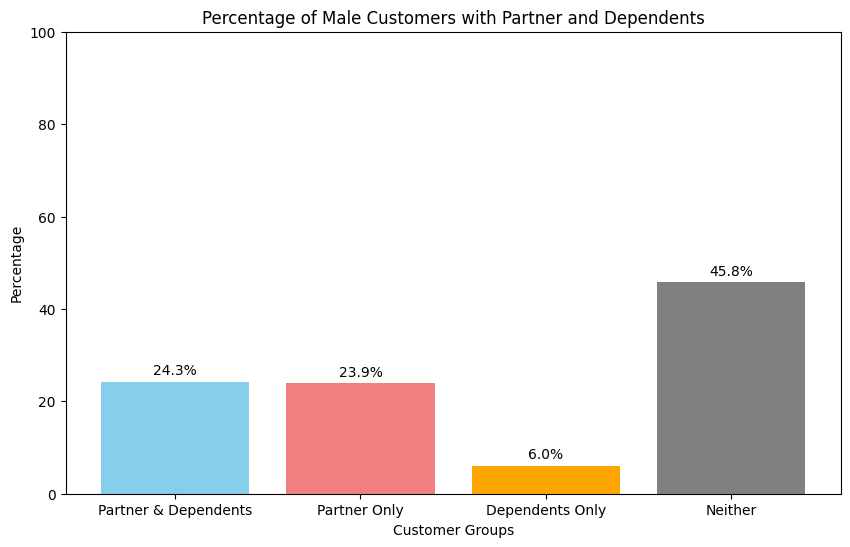

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into a DataFrame named 'df'
# Filter the DataFrame for the male gender
df_male = df[df['gender'] == 'Male']

# Calculate the percentage of male customers with 'Partner' and 'Dependents'
total_customers = len(df_male)
partner_dependents = len(df_male[(df_male['Partner'] == 'Yes') & (df_male['Dependents'] == 'Yes')])
partner_only = len(df_male[(df_male['Partner'] == 'Yes') & (df_male['Dependents'] == 'No')])
dependents_only = len(df_male[(df_male['Partner'] == 'No') & (df_male['Dependents'] == 'Yes')])
neither = len(df_male[(df_male['Partner'] == 'No') & (df_male['Dependents'] == 'No')])

# Calculate the percentages
partner_dependents_percent = partner_dependents / total_customers * 100
partner_only_percent = partner_only / total_customers * 100
dependents_only_percent = dependents_only / total_customers * 100
neither_percent = neither / total_customers * 100

# Plot the stacked bar chart
labels = ['Partner & Dependents', 'Partner Only', 'Dependents Only', 'Neither']
percentages = [partner_dependents_percent, partner_only_percent, dependents_only_percent, neither_percent]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['skyblue', 'lightcoral', 'orange', 'grey'])
plt.ylim(top=100)
plt.xlabel('Customer Groups')
plt.ylabel('Percentage')
plt.title('Percentage of Male Customers with Partner and Dependents')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

In [22]:
df[df['gender']=='Male']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [23]:
df[df['gender']=='Male']['Dependents'].value_counts()

No     2473
Yes    1076
Name: Dependents, dtype: int64

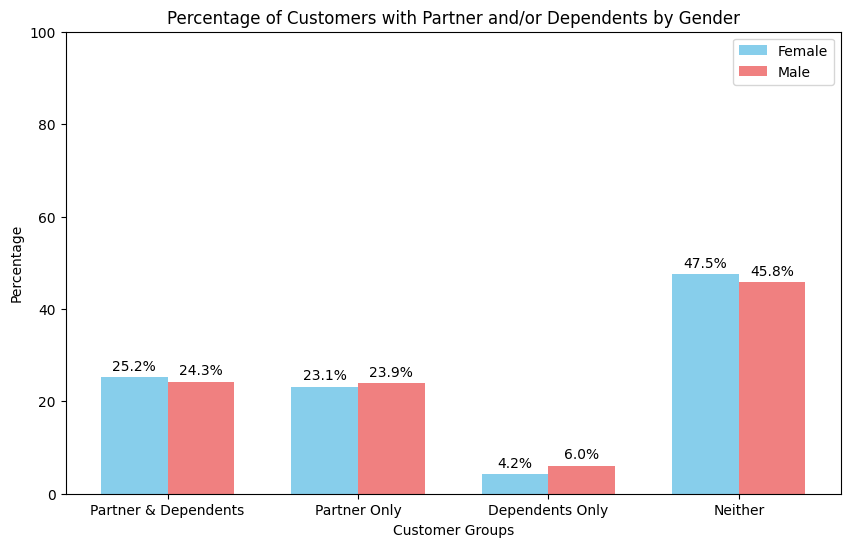

In [24]:
df_female = df[df['gender'] == 'Female']
df_male = df[df['gender'] == 'Male']

# Function to calculate the percentages
def calculate_percentages(data):
    """Function to calculate the percentages"""
    total_customers = len(data)
    partner_dependents = len(data[(data['Partner'] == 'Yes') & (data['Dependents'] == 'Yes')])
    partner_only = len(data[(data['Partner'] == 'Yes') & (data['Dependents'] == 'No')])
    dependents_only = len(data[(data['Partner'] == 'No') & (data['Dependents'] == 'Yes')])
    neither = len(data[(data['Partner'] == 'No') & (data['Dependents'] == 'No')])

    partner_dependents_percent = partner_dependents / total_customers * 100
    partner_only_percent = partner_only / total_customers * 100
    dependents_only_percent = dependents_only / total_customers * 100
    neither_percent = neither / total_customers * 100

    return [partner_dependents_percent, partner_only_percent, dependents_only_percent, neither_percent]

# Calculate percentages for each gender
female_percentages = calculate_percentages(df_female)
male_percentages = calculate_percentages(df_male)

# Plot the stacked bar chart
labels = ['Partner & Dependents', 'Partner Only', 'Dependents Only', 'Neither']

plt.figure(figsize=(10, 6))
width = 0.35
x = range(len(labels))

# Plot Female data
plt.bar(x, female_percentages, width, label='Female', color='skyblue')

# Plot Male data beside Female data
plt.bar([i + width for i in x], male_percentages, width, label='Male', color='lightcoral')

plt.ylim(top=100)
plt.xlabel('Customer Groups')
plt.ylabel('Percentage')
plt.title('Percentage of Customers with Partner and/or Dependents by Gender')
plt.xticks([i + width/2 for i in x], labels)
plt.legend()

# Annotate the bars with percentages
for i, percentage in enumerate(female_percentages):
    plt.annotate(f'{percentage:.1f}%', xy=(i, percentage),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

for i, percentage in enumerate(male_percentages):
    plt.annotate(f'{percentage:.1f}%', xy=(i + width, percentage),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

The genders are well balanced in these categories. The amount of males with dependents only is a bit higher than the amount of females. The amount of females with no partners and no dependents is slightly bigger than the amount of male

In [25]:
len(df['MonthlyCharges'].value_counts())

1584

In [26]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


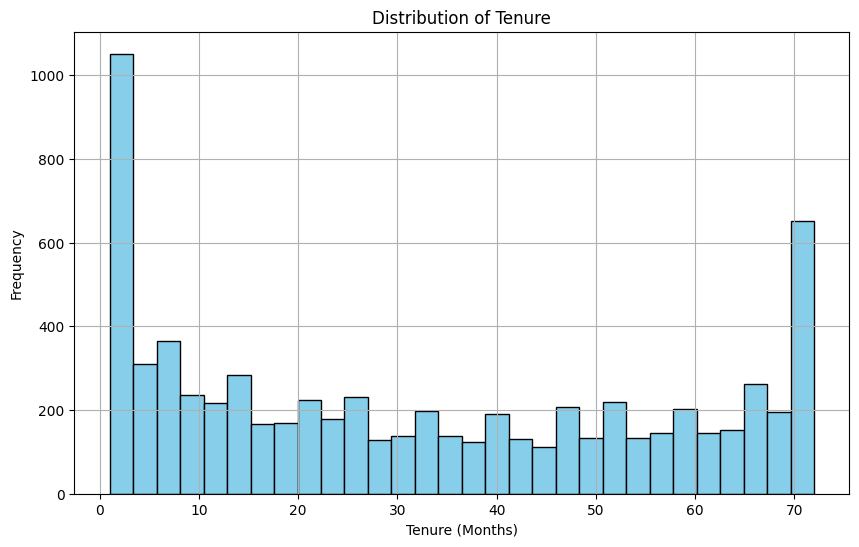

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['tenure'], bins=30, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.grid(True)
plt.show()

By checking tenures distribution we can see that more than a thousand customers (>14%) have been with the company for just a few months and more than 600 (8%) have been with the company for more than 72 months. Let's check the 'Contract' feature:

In [28]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

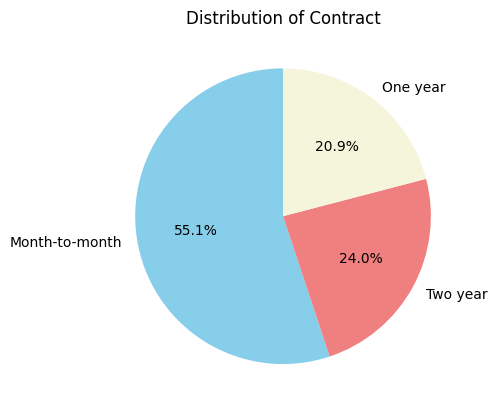

In [29]:
counts = df['Contract'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'beige'])
plt.title('Distribution of Contract')
plt.show()

More than half of contracts are month-to-month contracts. 1/4 are two year contracts and 1/5 are one year contracts

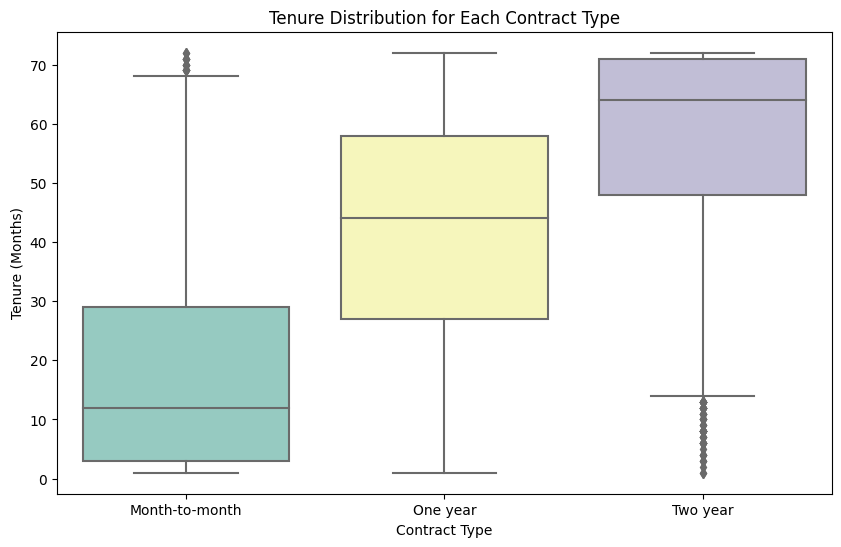

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', data=df, palette='Set3')
plt.xlabel('Contract Type')
plt.ylabel('Tenure (Months)')
plt.title('Tenure Distribution for Each Contract Type')
plt.show()

As expected, the tenure values increase with the length of the contract. Month-to-month contracts have a median close to 10 months and 2 year contract have a median value above 60 months

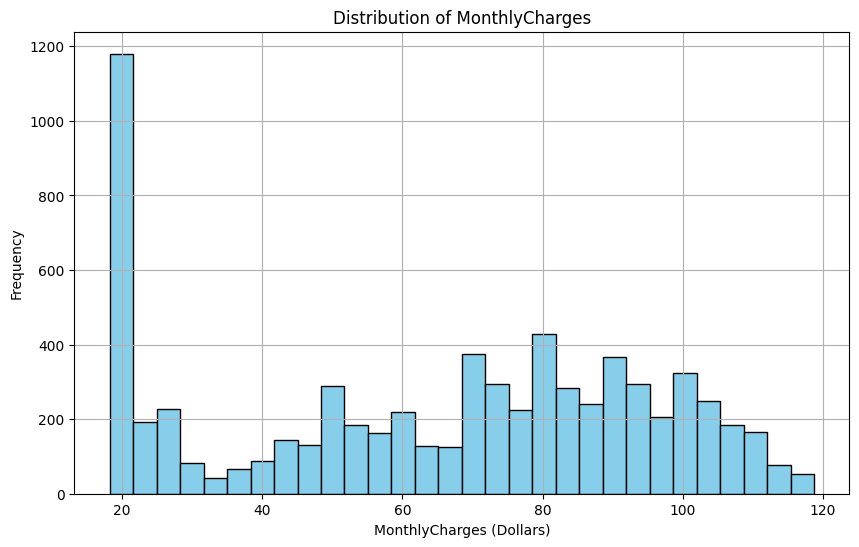

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyCharges'], bins=30, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('MonthlyCharges (Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of MonthlyCharges')
plt.grid(True)
plt.show()

In [32]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

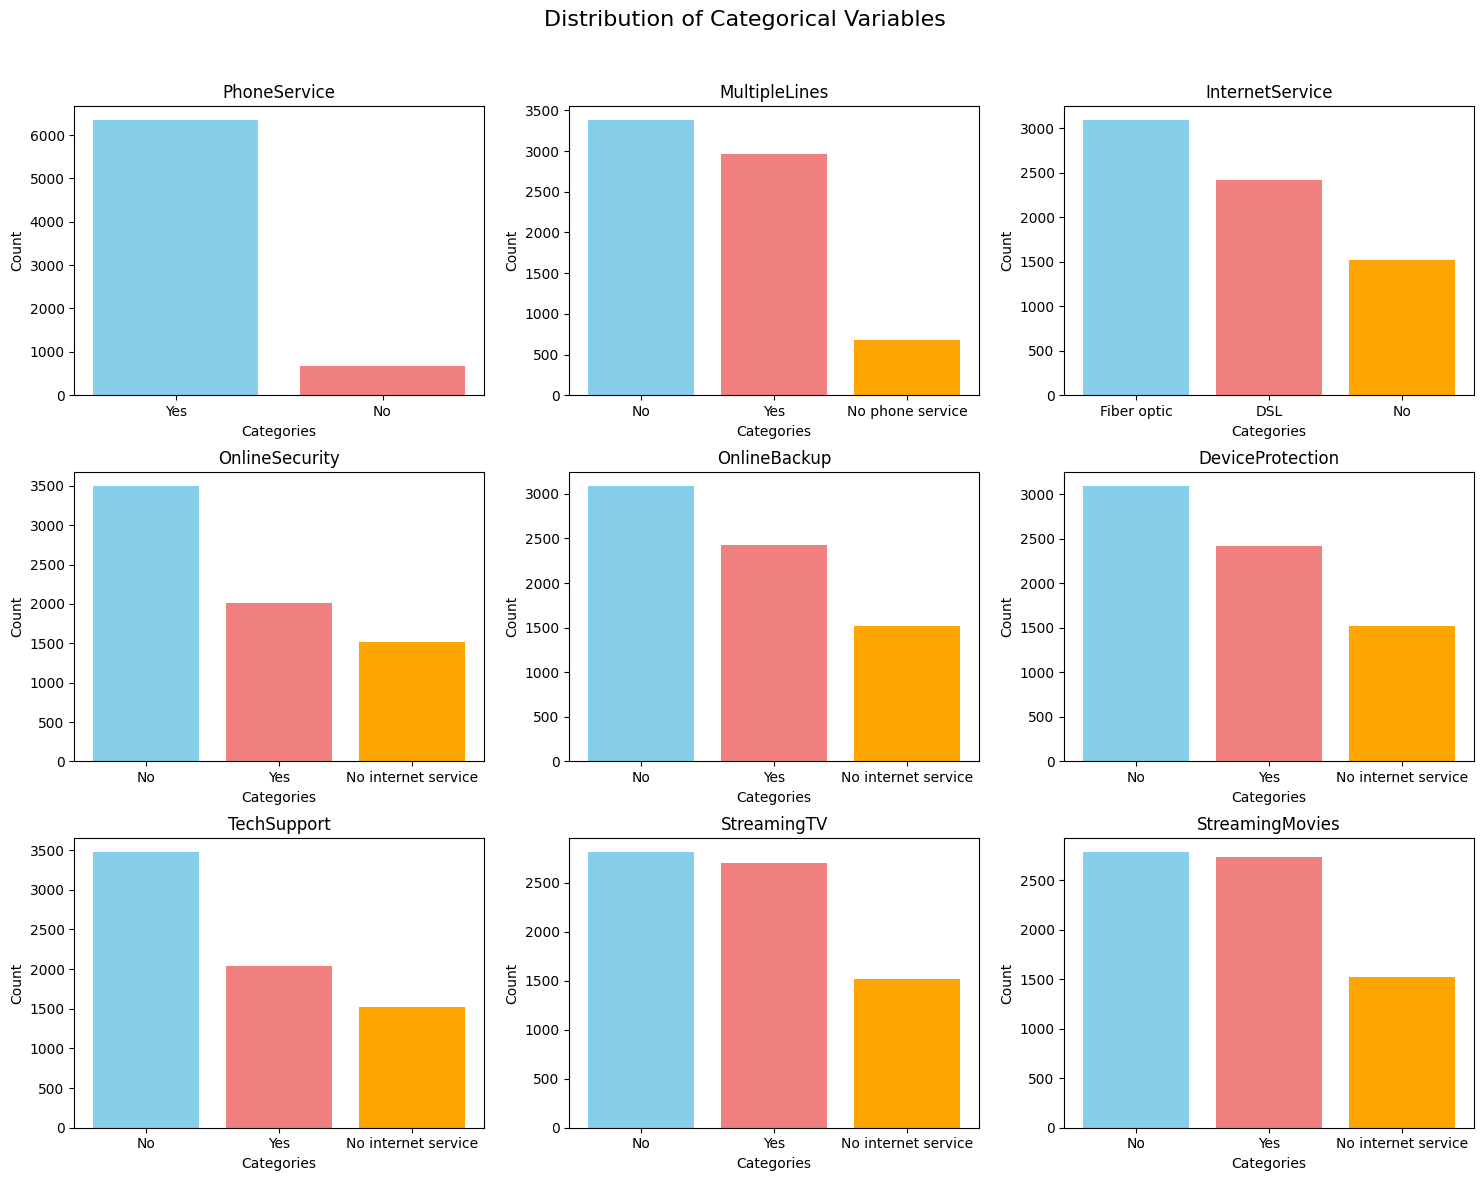

In [34]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

axes = axes.flatten()

for service, ax in zip(services, axes):
    ax.bar(df[service].value_counts().index, df[service].value_counts(), color=['skyblue', 'lightcoral', 'orange'])
    ax.set_title(service)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

__Distribution of OnlineSecurity, StreamingTV and DeviceProtection status of customers with Internet Service__

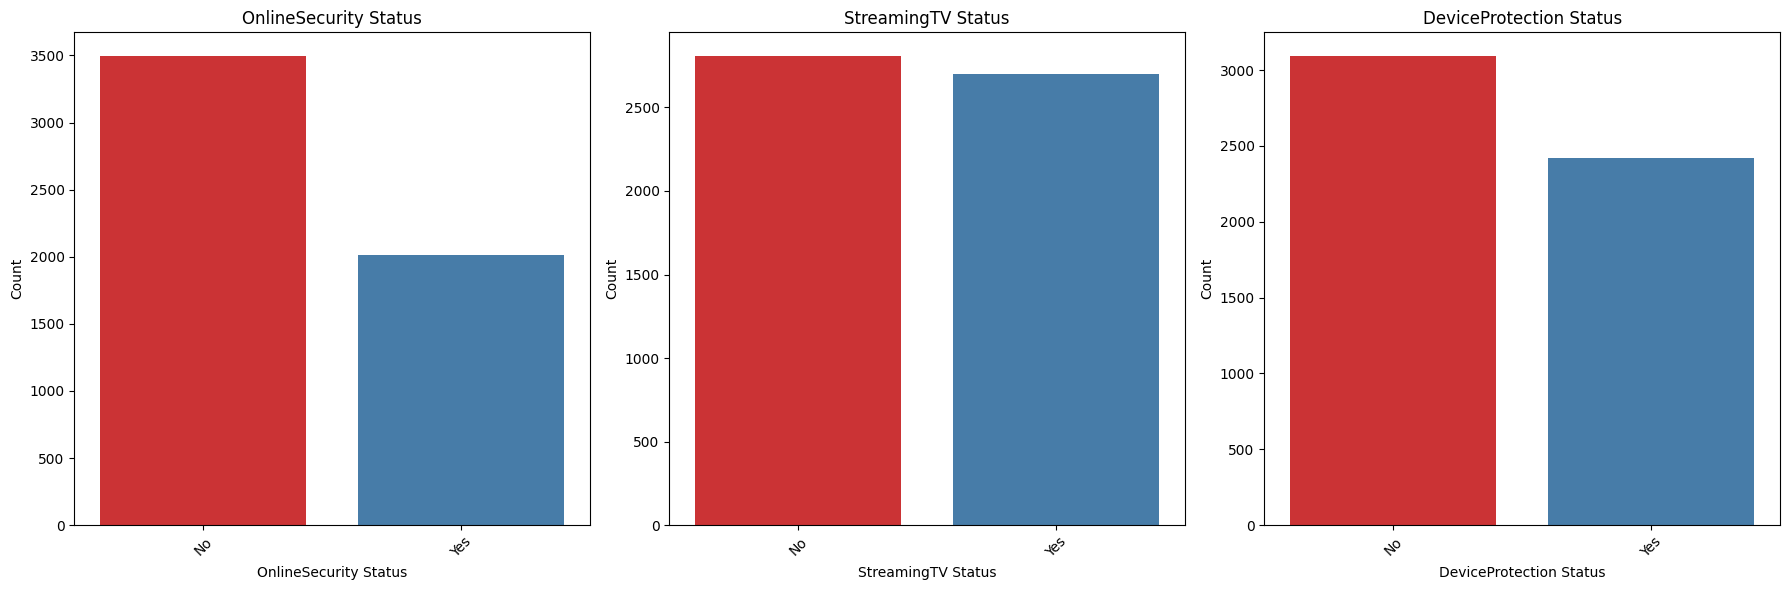

In [34]:
internet_customers = df[df['InternetService'] != 'No']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.countplot(data=internet_customers, x='OnlineSecurity', palette='Set1', ax=axes[0])
axes[0].set_title("OnlineSecurity Status")
axes[0].set_xlabel('OnlineSecurity Status')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.countplot(data=internet_customers, x='StreamingTV', palette='Set1', ax=axes[1])
axes[1].set_title("StreamingTV Status")
axes[1].set_xlabel('StreamingTV Status')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

sns.countplot(data=internet_customers, x='DeviceProtection', palette='Set1', ax=axes[2])
axes[2].set_title("DeviceProtection Status")
axes[2].set_xlabel('DeviceProtection Status')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

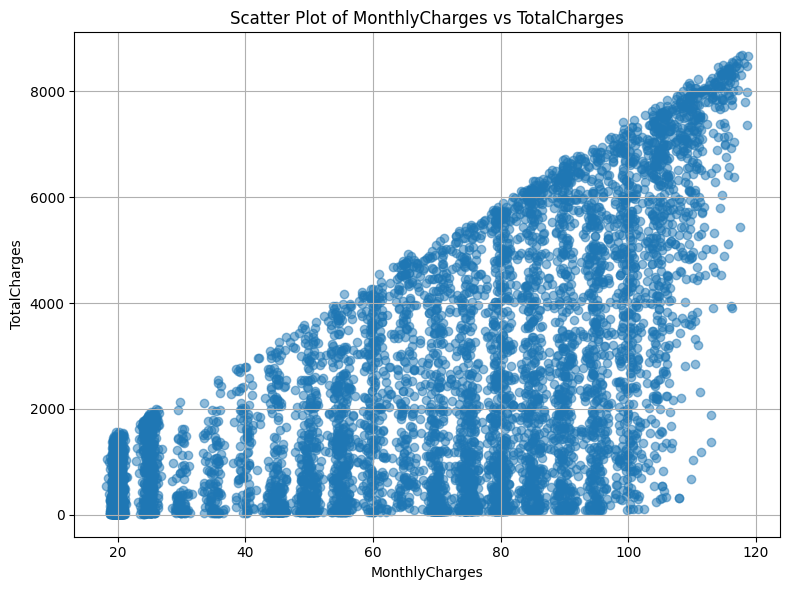

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], alpha=0.5)
plt.title('Scatter Plot of MonthlyCharges vs TotalCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.grid(True)
plt.tight_layout()
plt.show()

We can see in this scatter plot that the higher the monthly charges the higher the total charges

## Target Analysis

In [36]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

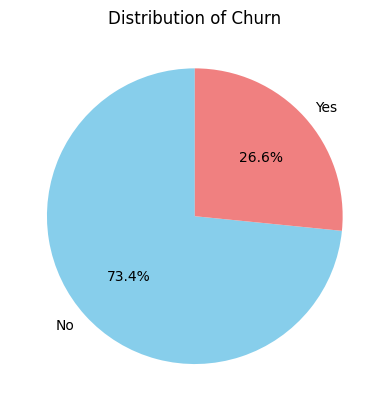

In [37]:
counts = df['Churn'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Churn')
plt.show()

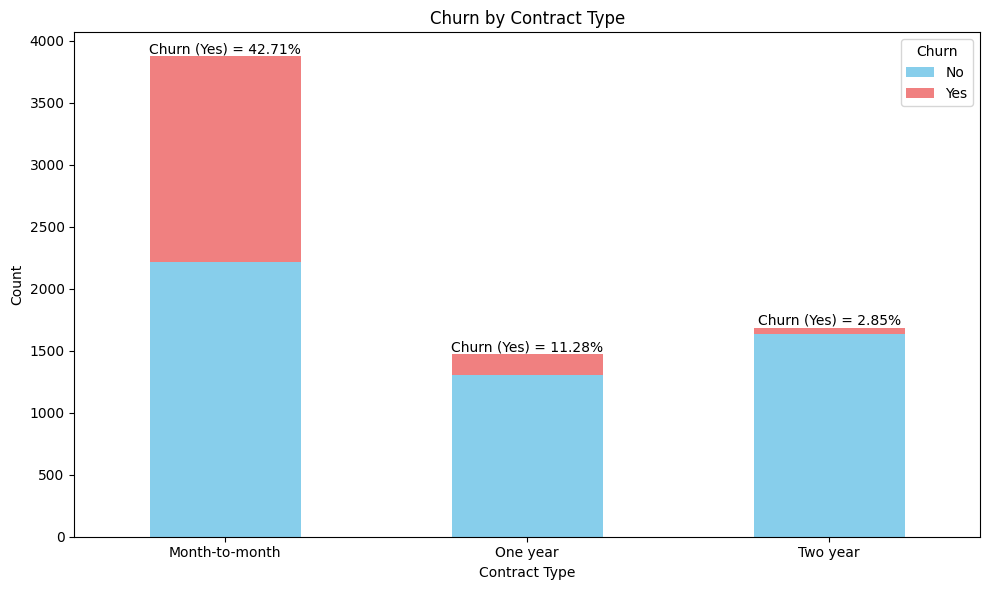

In [50]:
contract_churn_counts = df.groupby(['Contract', 'Churn']).size().unstack()

contract_churn_rates = (contract_churn_counts['Yes'] / (contract_churn_counts['Yes'] + contract_churn_counts['No'])) * 100

ax = contract_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])

for i, rate in enumerate(contract_churn_rates):
    ax.text(i, contract_churn_counts.sum(axis=1).iloc[i], f'Churn (Yes) = {rate:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

This bar plot shows that most customers with Churn=='Yes' have Month-to-Month contracts, with almost 43% of customers with this type of contract having Churn=='Yes'

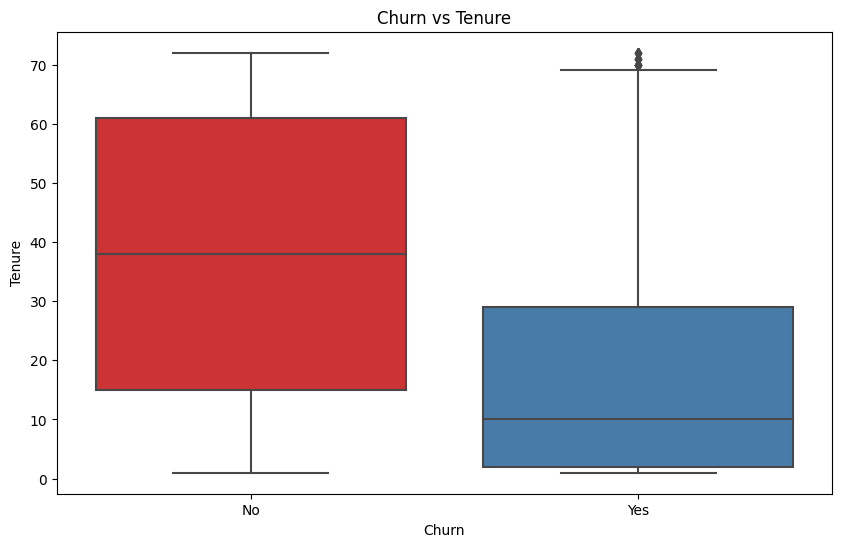

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set1')
plt.title('Churn vs Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

Customers with higher tenure are most likely to have Churn='No'